In [4]:
#Importing Libraries

In [430]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [431]:
##Data Preprocessing

In [432]:
###Training Image Preprocessing

In [433]:
import tensorflow as tf

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)


Found 933 files belonging to 4 classes.


In [434]:
#Validation Image Preprocessing

In [435]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 320 files belonging to 4 classes.


In [436]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [437]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[255.      255.      255.     ]
   [255.      255.      255.     ]
   [255.      255.      255.     ]
   ...
   [255.      255.      255.     ]
   [255.      255.      255.     ]
   [255.      255.      255.     ]]

  [[255.      255.      255.     ]
   [255.      255.      255.     ]
   [255.      255.      255.     ]
   ...
   [255.      255.      255.     ]
   [255.      255.      255.     ]
   [255.      255.      255.     ]]

  [[255.      255.      255.     ]
   [255.      255.      255.     ]
   [255.      255.      255.     ]
   ...
   [255.      255.      255.     ]
   [255.      255.      255.     ]
   [255.      255.      255.     ]]

  ...

  [[252.80078 252.80078 252.80078]
   [252.80078 252.80078 252.80078]
   [252.80078 252.80078 252.80078]
   ...
   [255.      255.      255.     ]
   [255.      255.      255.     ]
   [255.      255.      255.     ]]

  [[253.      253.      253.     ]
   [253.      253.      253.     ]
   [253.      253.      253.     ]
 

In [438]:
#Building Model

In [478]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [479]:
model = Sequential()

In [480]:
##Building Convolutinal Layer

In [481]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [482]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [483]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [484]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [485]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [486]:
model.add(Dropout(0.25))

In [487]:
model.add(Flatten())

In [488]:
model.add(Dense(units=1500,activation='relu'))

In [489]:
model.add(Dropout(0.4))

In [490]:
#output Layer
model.add(Dense(units=4,activation='softmax'))

In [491]:
#compiling Model

In [492]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [493]:
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_262 (Conv2D)                  │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_263 (Conv2D)                  │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_128 (MaxPooling2D)     │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_264 (Conv2D)                  │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_265 (Conv2D)                  │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_129 (MaxPooling2D)     │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_266 (Conv2D)                  │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_267 (Conv2D)                  │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_130 (MaxPooling2D)     │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_268 (Conv2D)                  │ (None, 30, 30, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_269 (Conv2D)                  │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_131 (MaxPooling2D)     │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_270 (Conv2D)                  │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_271 (Conv2D)                  │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_132 (MaxPooling2D)     │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_27 (Flatten)                 │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 1500)                │      27,649,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 4)                   │           6,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,367,728 (123.47 MB)

 Trainable params: 32,367,728 (123.47 MB)

 Non-trainable params: 0 (0.00 B)

In [494]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 201s 6s/step - accuracy: 0.5260 - loss: 2.7798 - val_accuracy: 0.8125 - val_loss: 0.5766
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 216s 7s/step - accuracy: 0.8151 - loss: 0.4756 - val_accuracy: 0.7469 - val_loss: 0.6504
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 349s 12s/step - accuracy: 0.8338 - loss: 0.3779 - val_accuracy: 0.6812 - val_loss: 0.9453
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 317s 11s/step - accuracy: 0.8776 - loss: 0.3658 - val_accuracy: 0.7969 - val_loss: 0.5226
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 321s 11s/step - accuracy: 0.9109 - loss: 0.2231 - val_accuracy: 0.8219 - val_loss: 0.4370
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 372s 12s/step - accuracy: 0.9191 - loss: 0.2227 - val_accuracy: 0.9344 - val_loss: 0.1869
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 255s 8s/step - accuracy: 0.9517 - loss: 0.1521 - val_accuracy: 0.9344 - val_loss: 0.1793
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 246s 8s/step - accuracy: 0.9582 - loss: 0.1430 - val_accuracy: 0.9375

In [495]:
#Model Evaluation

In [496]:
#Model Evaluation on Training Set
train_loss,train_acc = model.evaluate(training_set)

30/30 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.9791 - loss: 0.0522


In [497]:
print(train_loss,train_acc)

0.04764964058995247 0.986066460609436


In [498]:
#Model Evaluation on Training Set
val_loss,val_acc = model.evaluate(validation_set)

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9446 - loss: 0.2229


In [499]:
print(val_loss,val_acc)

0.22405031323432922 0.949999988079071


In [500]:
#Saving model

In [502]:
model.save("trained_model.keras")

In [503]:
training_history.history

{'accuracy': [0.6377277374267578,
  0.821007490158081,
  0.8703108429908752,
  0.8992497324943542,
  0.9217577576637268,
  0.9271168112754822,
  0.9464094042778015,
  0.9549839496612549,
  0.971061110496521,
  0.9699892997741699],
 'loss': [1.4296845197677612,
  0.44007596373558044,
  0.31222814321517944,
  0.28932985663414,
  0.20300598442554474,
  0.19775602221488953,
  0.16964739561080933,
  0.14367492496967316,
  0.09298434853553772,
  0.06601102650165558],
 'val_accuracy': [0.8125,
  0.746874988079071,
  0.6812499761581421,
  0.796875,
  0.8218749761581421,
  0.934374988079071,
  0.934374988079071,
  0.9375,
  0.953125,
  0.949999988079071],
 'val_loss': [0.576644241809845,
  0.6504161953926086,
  0.945259690284729,
  0.5226227641105652,
  0.4369601309299469,
  0.18691544234752655,
  0.17925165593624115,
  0.20354075729846954,
  0.1528281718492508,
  0.22405031323432922]}

In [504]:
#recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [510]:
training_history.history['val_accuracy']

[0.8125,
 0.746874988079071,
 0.6812499761581421,
 0.796875,
 0.8218749761581421,
 0.934374988079071,
 0.934374988079071,
 0.9375,
 0.953125,
 0.949999988079071]

In [505]:
##Acuracy Validation

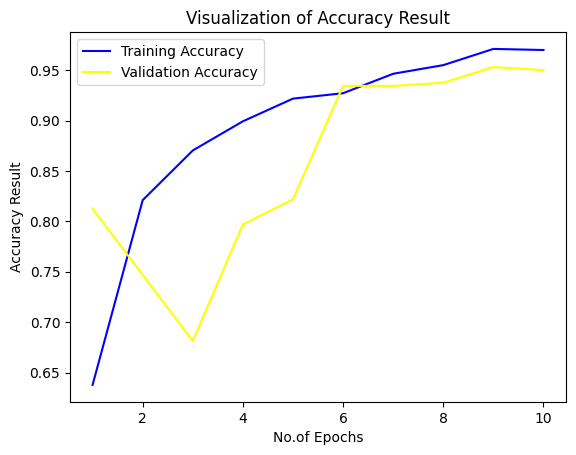

In [515]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='blue',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='yellow',label='Validation Accuracy')
plt.xlabel("No.of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [516]:
###Some other metrics for model evaluation

In [518]:
class_name = validation_set.class_names
class_name

['Fresh_State', 'Last_stage', 'Mid_Stage', 'labels']

In [519]:
test_set = validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 320 files belonging to 4 classes.


In [520]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step


(array([[1.03381113e-03, 1.38307433e-03, 9.97582555e-01, 5.79571292e-07],
        [9.99752820e-01, 2.47173710e-04, 8.28633884e-10, 1.67488107e-11],
        [9.44258451e-01, 5.57415150e-02, 1.02132365e-08, 1.82155166e-10],
        ...,
        [6.32055453e-04, 3.54960677e-04, 9.99010801e-01, 2.15937371e-06],
        [4.47641639e-03, 2.93769961e-04, 9.95224714e-01, 5.04954733e-06],
        [3.82142607e-03, 1.47889031e-03, 9.94689703e-01, 1.00055931e-05]],
       dtype=float32),
 (320, 4))

In [521]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [522]:
predicted_categories

<tf.Tensor: shape=(320,), dtype=int64, numpy=
array([2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [524]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(320, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)>

In [525]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(320,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [ ]:
!pip install scikit-learn

In [536]:
from sklearn.metrics import classification_report

In [539]:
import numpy as np

unique_classes = np.unique(Y_true)
print("Unique Classes:", unique_classes)


Unique Classes: [0 1 2]


In [540]:
class_names = ['Fresh_State', 'Last_stage', 'Mid_Stage']  # Replace with actual class names


In [545]:
from sklearn.metrics import classification_report, confusion_matrix

In [543]:
print(classification_report(Y_true, predicted_categories, target_names=class_names))

              precision    recall  f1-score   support

 Fresh_State       0.94      0.95      0.95       120
  Last_stage       0.97      0.90      0.93       100
   Mid_Stage       0.94      1.00      0.97       100

    accuracy                           0.95       320
   macro avg       0.95      0.95      0.95       320
weighted avg       0.95      0.95      0.95       320



In [549]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[114,   3,   3],
       [  7,  90,   3],
       [  0,   0, 100]], dtype=int64)

In [550]:
##Confusion Mtrix Visualization

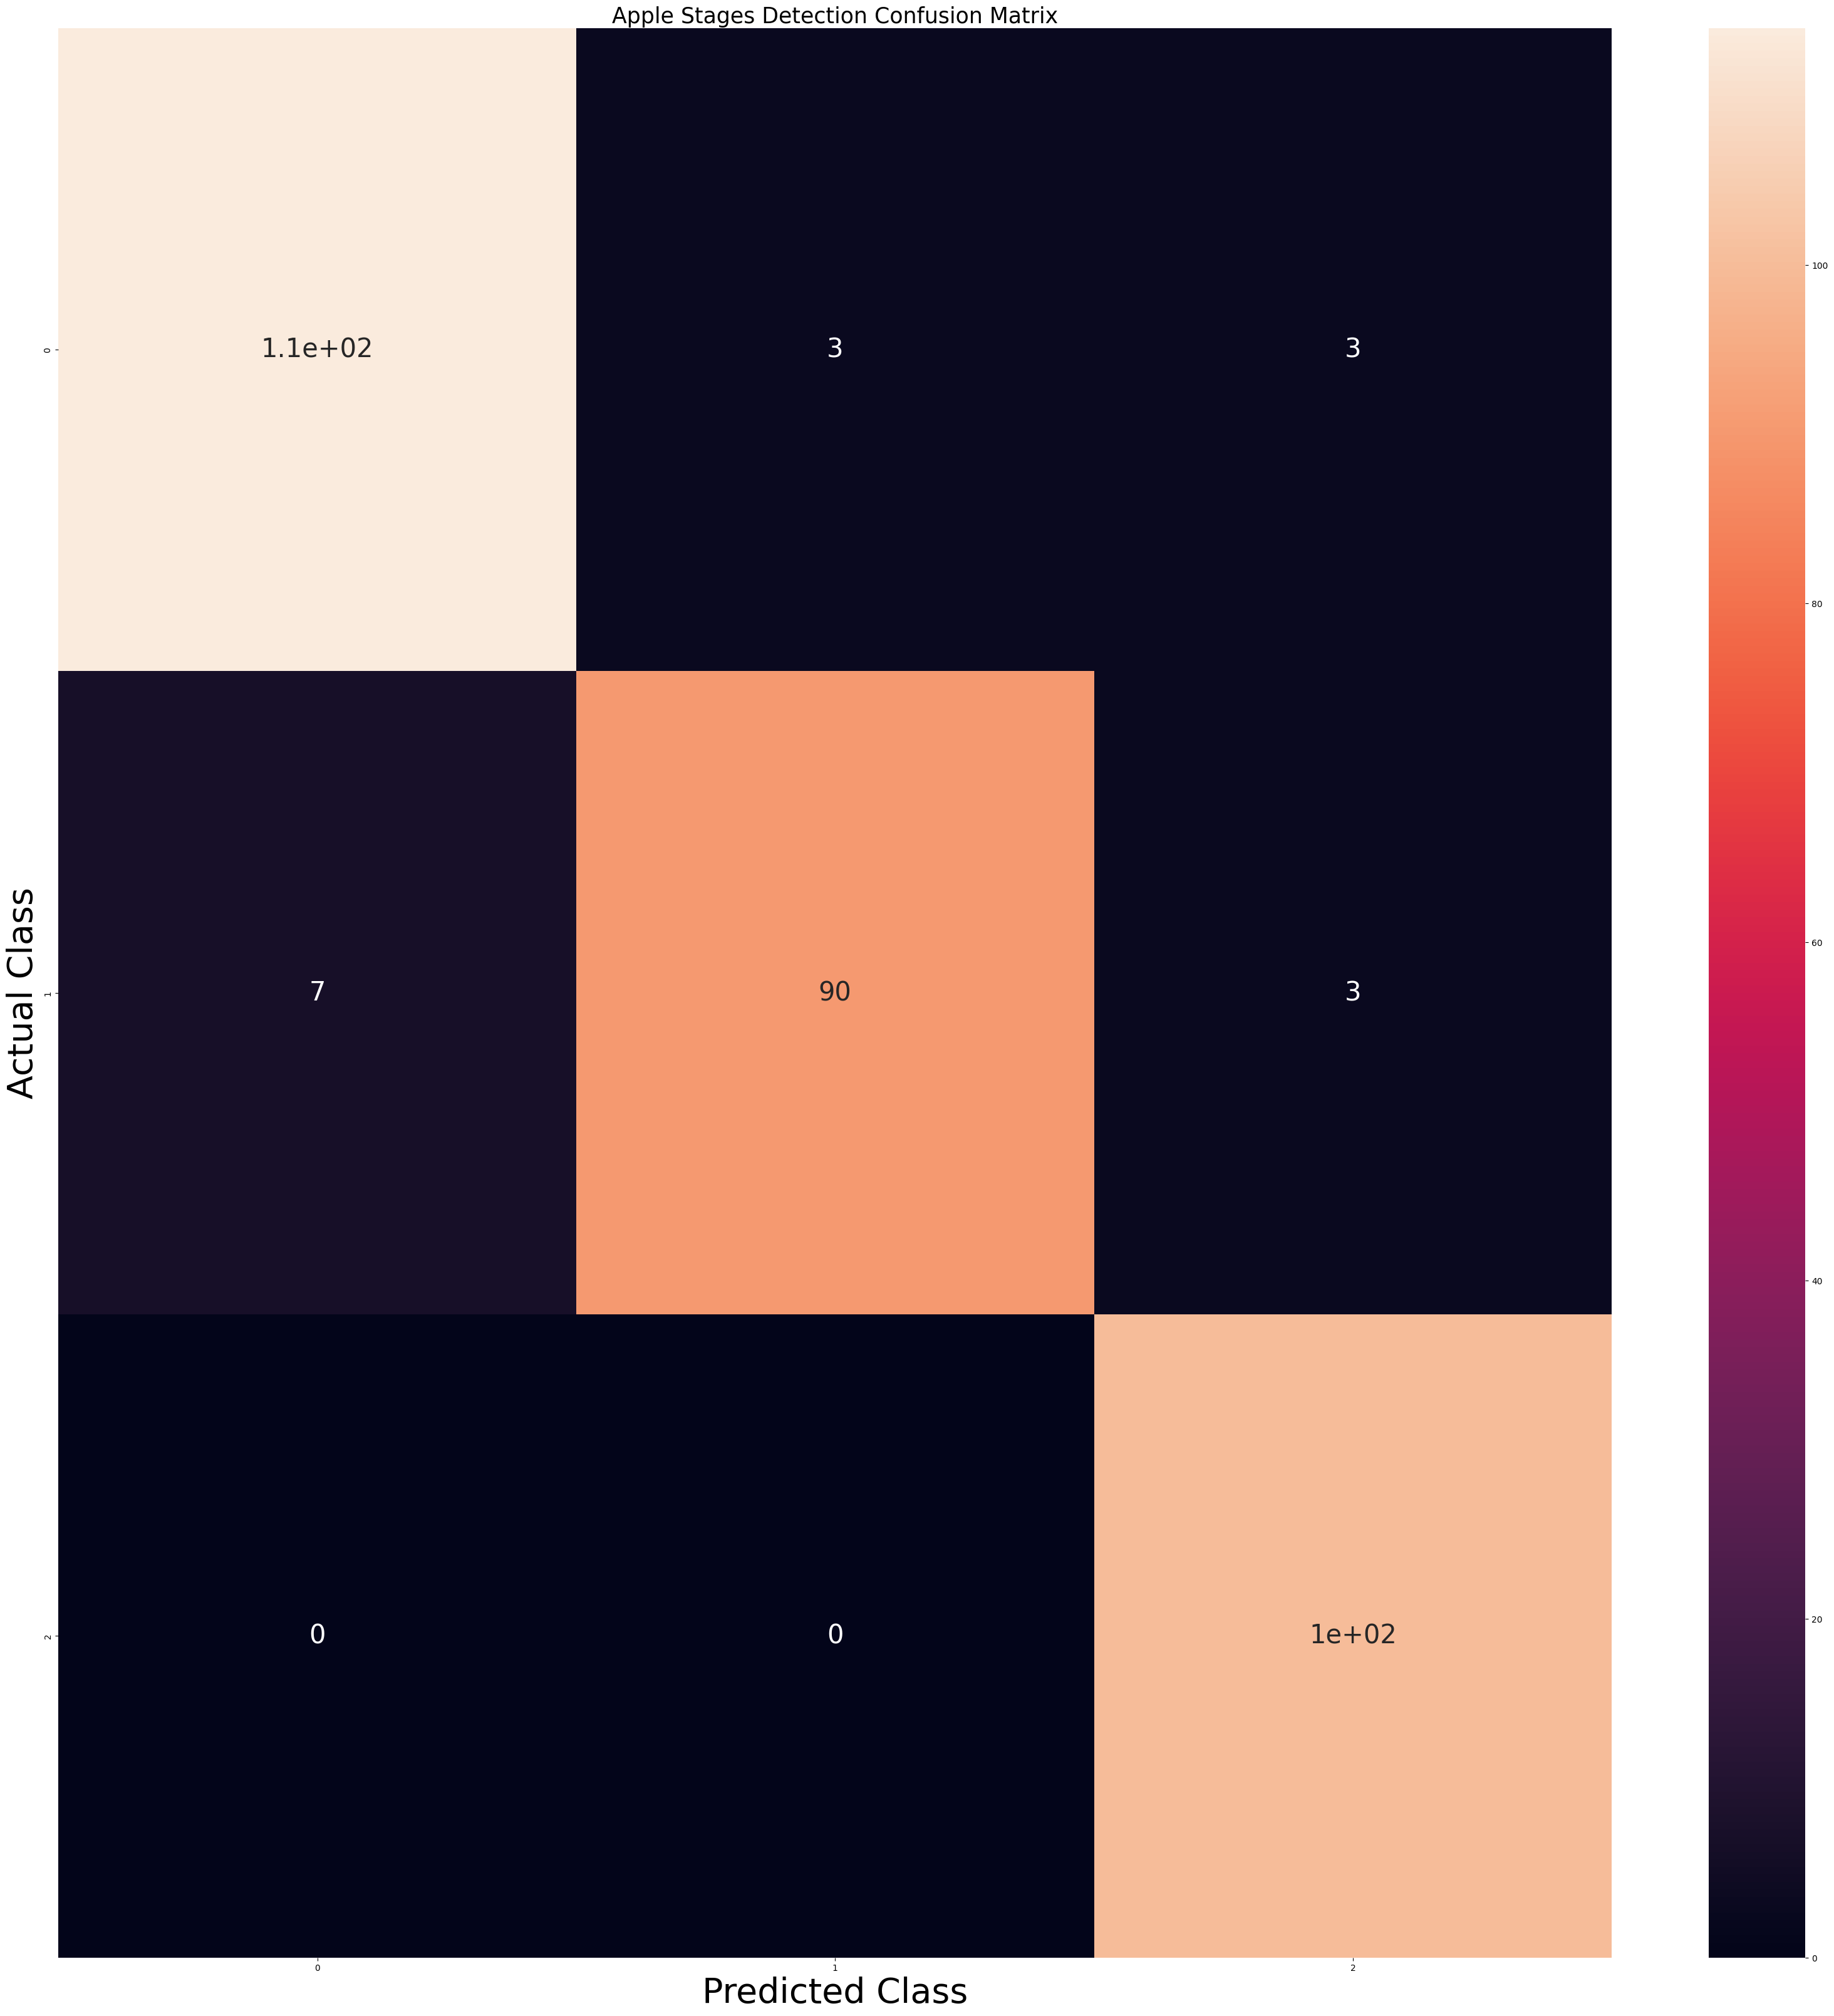

In [563]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':30})
plt.xlabel("Predicted Class",fontsize=40)
plt.ylabel("Actual Class",fontsize=40)
plt.title("Apple Stages Detection Confusion Matrix",fontsize=25)
plt.show()